# Understanding nighttime methane signals at the Amazon Tall Tower Observatory (ATTO)

### Santiago Botía B et al
#### Calculations after comments of referee 2.
- Looking at the profile of friction velocity at two tim-resolutions.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import pandas as pd
import seaborn as sns
import scipy
import matplotlib as mpl
import os
%matplotlib inline

## Analysis at 30 min
---

In [34]:
# importing data used for paper
df_full = pd.read_pickle('./to_Share/Data/ATTO_GHG_Inst_flux_soil_30min')

In [35]:
# new data path
path = '/Users/santiago/ownCloud/1_Analysis/0_Tower_Observations/ATTO_My_DataAnalysis/data/Datos_ATTO2019Met_Santiago Botia/'

In [36]:
files = os.listdir(path)

In [48]:
# reading new data for 46m height and merging in one df
#df_full_46m = pd.DataFrame()

for i,j in enumerate(files):
    if 'INST46' in j and i == 0:
        print(j)
        df_full_46m = pd.read_excel(path+j,header=0)
        #print(df_full_46m.shape,df_full_46m.columns)
    elif 'INST46' in j:
        print(j)
        to_append   = pd.read_excel(path+j,header=0)
        df_full_46m = df_full_46m.append(to_append)
        #print(df_full_46m.shape,df_full_46m.columns)
#df_full_46m.head()

INST46_Fluxos_18_Pre_certificados.xlsx
INST46_Fluxos_16_Pre_certificados.xlsx
INST46_Fluxos_14_Pre_certificados.xlsx
INST46_Fluxos_13_Pre_certificados.xlsx
INST46_Fluxos_17_Pre_certificados.xlsx
INST46_Fluxos_15_Pre_certificados.xlsx


In [49]:
df_full_46m.columns = ['Datetime','Year','doy','DecTime','FluxTsonic[Watt/m2]','CO2_flux[umol/m2/s]',
                       'Flux_Op-H2O[Watt/m2]','Qf_f_tsonic','Qf_F_Op-CO2','Qf_F_Op-H2O',
                       'Flux_Tau[kg]/m2/s','Mean_Windsp[m/s]','Mean_Tsonic[C]','Mean_Op-CO2[umol/mol]',
                       'Mean_Op-H2O[gram/m3]','Mean_APress[Pa]','U-star[m/s]','Z-over-L',
                       'Wind-Direc-corrg[deg]','80PercFlux[meter]']

In [50]:
df_full_46m.drop(0,axis=0,inplace=True)
df_full_46m.head(3)

,Datetime,Year,doy,DecTime,FluxTsonic[Watt/m2],CO2_flux[umol/m2/s],Flux_Op-H2O[Watt/m2],Qf_f_tsonic,Qf_F_Op-CO2,Qf_F_Op-H2O,Flux_Tau[kg]/m2/s,Mean_Windsp[m/s],Mean_Tsonic[C],Mean_Op-CO2[umol/mol],Mean_Op-H2O[gram/m3],Mean_APress[Pa],U-star[m/s],Z-over-L,Wind-Direc-corrg[deg],80PercFlux[meter]
1,2018-01-01 00:30:00,18,1,0.5,-6.7706,1.89363,-1.06858,0,1,1,0.0169946,1.88307,26.6142,387.461,22.4297,98520.5,0.122555,0.885764,64.2537,NaN
2,2018-01-01 01:00:00,18,1,1,0.11249,0.170728,1.53393,1,0,1,0.00372912,1.82617,26.7507,384.591,22.3625,98570.3,0.0574064,-0.143142,79.2026,6162
3,2018-01-01 01:30:00,18,1,1.5,-3.05915,-0.130012,6.62816,0,1,1,0.0155119,1.85121,26.6025,385.682,22.0003,98619.7,0.117012,0.459554,46.7153,NaN


In [51]:
df_full_46m['Datetime'] = pd.to_datetime(df_full_46m['Datetime'])

In [52]:
df_full_46m.sort_values(by='Datetime',inplace=True)
df_full_46m.set_index('Datetime',inplace=True)
df_full_46m.index = df_full_46m.index.shift(-4,freq='H')
df_full_46m.head(3)

,Year,doy,DecTime,FluxTsonic[Watt/m2],CO2_flux[umol/m2/s],Flux_Op-H2O[Watt/m2],Qf_f_tsonic,Qf_F_Op-CO2,Qf_F_Op-H2O,Flux_Tau[kg]/m2/s,Mean_Windsp[m/s],Mean_Tsonic[C],Mean_Op-CO2[umol/mol],Mean_Op-H2O[gram/m3],Mean_APress[Pa],U-star[m/s],Z-over-L,Wind-Direc-corrg[deg],80PercFlux[meter]
Datetime,,,,,,,,,,,,,,,,,,,
2012-12-31 20:30:00,13,1,0.5,-6.4292,0.082847,-1.0875,4,101,1,0.0079258,1.2953,29.542,409.89,21.496,98900,0.083849,2.9555,283.86,27700
2012-12-31 21:00:00,13,1,1,-2.5144,1.4341,1.6183,1,4,1,0.015429,1.4759,29.759,410.52,21.625,98900,0.11703,0.39656,293.18,9054
2012-12-31 21:30:00,13,1,1.5,0.60665,-12.819,-10.351,1,7,7,0.023479,1.4285,29.581,401.37,21.349,98923,0.14431,0.0016885,297.61,2566


In [53]:
df_full_46m = df_full_46m.astype(np.float64)

In [55]:
# Creating a new df with the variables of interest from above dataframes
df_two_lev = pd.DataFrame()
df_two_lev = df_two_lev.assign(Ustar81m = df_full.loc['2012-12-31 20:30:00':,'U-star[m/s]'])
df_two_lev = df_two_lev.assign(Wsp81m = df_full.loc['2012-12-31 20:30:00':,'Mean_Windsp[m/s]'])
df_two_lev = df_two_lev.assign(Wsp26m = df_full.loc['2012-12-31 20:30:00':,'WSp_26m'])
df_two_lev = df_two_lev.assign(Wsp42m = df_full.loc['2012-12-31 20:30:00':,'WSp_42m'])
df_two_lev = df_two_lev.assign(Ustar46m = df_full_46m['U-star[m/s]'])
df_two_lev = df_two_lev.assign(Wsp46m = df_full_46m['Mean_Windsp[m/s]'])
df_two_lev = df_two_lev.assign(GradFlag = df_full.loc['2012-12-31 20:30:00':,'GradFlag'])
df_two_lev = df_two_lev.between_time('20:00','06:00')
df_two_lev.head(3)

,Ustar81m,Wsp81m,Wsp26m,Wsp42m,Ustar46m,Wsp46m,GradFlag
LTime,,,,,,,
2012-12-31 20:30:00,0.106470,1.2917,0.249000,1.137667,0.083849,1.2953,False
2012-12-31 21:00:00,0.047695,0.8159,0.256333,1.165000,0.117030,1.4759,False
2012-12-31 21:30:00,0.115590,1.0176,0.232667,1.387333,0.144310,1.4285,False


In [56]:
df_two_lev.describe()

,Ustar81m,Wsp81m,Wsp26m,Wsp42m,Ustar46m,Wsp46m
count,44525.000000,44582.000000,44236.000000,23156.000000,27850.000000,28188.000000
mean,0.137069,2.823735,0.198065,1.400287,0.183261,1.587732
std,0.137341,1.285459,0.114091,0.526627,0.122398,0.656773
min,0.000023,0.017753,0.010000,0.099000,0.000000,0.069944
25%,0.059022,1.827972,0.122000,1.038667,0.098817,1.113117
50%,0.094141,2.815794,0.164333,1.389333,0.162098,1.596000
75%,0.160750,3.771222,0.241333,1.714083,0.238319,2.044564
max,1.491769,13.033230,1.706000,5.703333,1.391400,8.682700


In [57]:
# Creating wind speed bins for aggregating friction velocity
bins       = pd.IntervalIndex.from_tuples([(0.1,0.3),(0.3, 0.7),(0.7, 1.3),(1.3,2.7),(2.7, 7.3),(7.3,12.7)])
df_two_lev = df_two_lev.assign(Wsp_int42m = pd.cut(df_two_lev['Wsp42m'],bins=bins))
df_two_lev = df_two_lev.assign(Wsp_int26m = pd.cut(df_two_lev['Wsp26m'],bins=bins))
df_two_lev = df_two_lev.assign(Wsp_int46m = pd.cut(df_two_lev['Wsp46m'],bins=bins))


In [58]:
# Definin the mid point of the interval for plotting easier
def mid(interval):
    return interval.mid

df_two_lev               = df_two_lev.assign(Wsp_mid42m = df_two_lev['Wsp_int42m'].apply(mid))
df_two_lev               = df_two_lev.assign(Wsp_mid26m = df_two_lev['Wsp_int26m'].apply(mid))
df_two_lev               = df_two_lev.assign(Wsp_mid46m = df_two_lev['Wsp_int46m'].apply(mid))
df_two_lev['Wsp_mid42m'] = df_two_lev['Wsp_mid42m'].astype(np.float64)
df_two_lev['Wsp_mid26m'] = df_two_lev['Wsp_mid26m'].astype(np.float64)
df_two_lev['Wsp_mid46m'] = df_two_lev['Wsp_mid46m'].astype(np.float64)

In [59]:
#wsp26 = df_two_lev.groupby(by='Wsp_mid26m')
#wsp42 = df_two_lev.groupby(by='Wsp_mid42m')
wsp46 = df_two_lev.groupby(by='Wsp_mid46m') # grouping the merged df based on wspeed bins at 46m
#binned_df2 = df_two_lev[df_two_lev['GradFlag']==False].groupby(by='Wsp_mid').mean()

In [60]:
# retrieving groups of the groupby object
groups = [0.2,0.5,1,2,5,10]
df_gro = pd.concat([wsp46.get_group(i) for i in groups])

In [61]:
# re arranging df into a melted one easier for seaborn plotting
melt = pd.melt(df_gro,id_vars=['Wsp_mid46m','GradFlag'],value_vars=['Ustar81m','Ustar46m'])

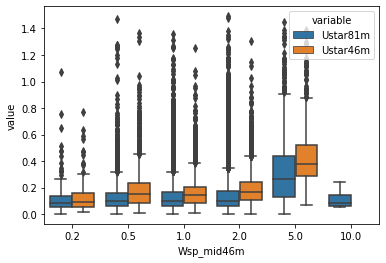

In [62]:
sns.boxplot(x='Wsp_mid46m',y='value',hue='variable',data=melt)

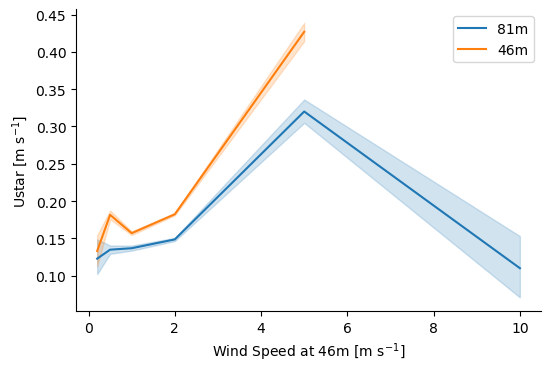

In [87]:
fig,ax1  = plt.subplots(1,1,figsize=(6,4),dpi=100)
sns.lineplot(x='Wsp_mid46m',y='value',hue='variable',data=melt,estimator='mean',ax=ax1)
ax1.set_xlabel('Wind Speed at 46m [m s$^{-1}$]')
ax1.set_ylabel('Ustar [m s$^{-1}$]')
ax1.legend(labels=['81m','46m'])
sns.despine()
plt.show()

## Analyzing one month of 1 min data
---

In [21]:
# This is in local time
df_full_1min = pd.read_pickle('./to_Share/Data/df_GHG_uvw_1min_merged')

In [22]:
df_full_1min.index.rename('LTime',inplace=True)

In [23]:
df_full_1min.head(2)

,mean_u,mean_v,mean_w,mean_T,sigma_u,sigma_v,sigma_w,sigma_T,uw,vw,...,Ustar,hour,cluster,WindClass,EnhanGrad,PotTempGrad81_4,WspGrad73_26,WindClassMid,windFlag,wind_15min_std
LTime,,,,,,,,,,,,,,,,,,,,,
2014-02-28 20:01:00,3.039536,-3.017160,0.014812,35.746776,0.284407,0.271031,0.177936,0.161903,-0.009119,0.000552,...,0.095582,20,ENE,"(4.0, 4.4]",False,3.091594,3.02,4.2,False,0.281251
2014-02-28 20:02:00,3.098273,-2.820844,0.107986,35.711248,0.275970,0.259612,0.166418,0.147514,-0.008522,0.006037,...,0.102194,20,ENE,"(4.0, 4.4]",False,3.001594,3.53,4.2,False,0.281251


In [64]:
# calculatin friction velocity and wind speed at 46m
df_46m = pd.read_table('../Scrapbook_MacWork/HockeyStickR/1minFiles/ATTO_46m_2014-08_1min.txt',header=None,skiprows=1)
df_46m.columns = ["datetime","angolo","thetamed", "sigma_theta","mean_u","mean_v","mean_w", 
                   "mean_T","sigma_u","sigma_v", "sigma_w","sigma_T", "uw","vw","uT","vT","wT"]
df_46m = df_46m.assign(Ustar46 = (df_46m.uw**2 + df_46m.vw**2)**(1/4))
df_46m = df_46m.assign(mean_wind46 = np.sqrt(df_46m['mean_u']**2+df_46m['mean_v']**2))
df_46m['datetime'] = pd.to_datetime(df_46m['datetime'])
df_46m.set_index('datetime',inplace=True)
df_46m.index = df_46m.index.shift(-4,freq='H')
del df_46m['angolo']
del df_46m['thetamed']
del df_46m['sigma_theta']
df_46m.head()

,mean_u,mean_v,mean_w,mean_T,sigma_u,sigma_v,sigma_w,sigma_T,uw,vw,uT,vT,wT,Ustar46,mean_wind46
datetime,,,,,,,,,,,,,,,
2014-07-31 20:01:00,0.847972,-0.752567,0.016948,30.967844,0.215692,0.313391,0.179305,0.149607,-0.010382,0.004202,-0.003484,-0.021217,-0.007483,0.105830,1.133761
2014-07-31 20:02:00,0.542006,-0.906948,0.050484,30.812313,0.274022,0.213855,0.164218,0.193293,-0.013228,0.010001,0.035456,-0.023039,-0.005499,0.128773,1.056563
2014-07-31 20:03:00,0.884497,-1.278541,0.047898,31.171155,0.418831,0.344243,0.174852,0.237427,-0.029693,0.005267,0.057177,-0.040419,-0.012089,0.173656,1.554671
2014-07-31 20:04:00,0.843480,-1.053837,0.046790,31.021857,0.480786,0.303450,0.214115,0.168407,-0.052870,0.003508,0.024245,-0.016434,-0.009812,0.230188,1.349827
2014-07-31 20:05:00,0.971020,-1.091978,-0.045847,31.148780,0.327153,0.196519,0.143254,0.134282,-0.012817,-0.005065,0.014937,-0.006536,-0.000409,0.117393,1.461265


In [65]:
# merging both dataframe the one at 81 m and the other at 46 m 
df_1min_concat = pd.concat([df_46m,df_full_1min],axis=1,join='inner')

In [66]:
# Selecting only nighttime
df_1min_concat_n = df_1min_concat.between_time('20:00','06:00')

In [67]:
# Creating wind speed bins
bins             = pd.IntervalIndex.from_tuples([(0.1,0.3),(0.3, 0.7),(0.7, 1.3),(1.3,2.7),(2.7, 7.3),(7.3,12.7)])
df_1min_concat_n = df_1min_concat_n.assign(Wsp_int = pd.cut(df_1min_concat_n['mean_wind46'],bins=bins))
df_1min_concat_n = df_1min_concat_n.assign(Wsp_mid = df_1min_concat_n['Wsp_int'].apply(mid))
df_1min_concat_n['Wsp_mid'] = df_1min_concat_n['Wsp_mid'].astype(np.float64)

In [68]:
# melting as above
melt2 = pd.melt(df_1min_concat_n,id_vars=['Wsp_mid','EnhanGrad'],value_vars=['Ustar','Ustar46'])

In [69]:
df_1min_concat_n['mean_wind46'].describe()

count    17130.000000
mean         1.606794
std          0.626070
min          0.015195
25%          1.179332
50%          1.654711
75%          2.046196
max          6.177197
Name: mean_wind46, dtype: float64

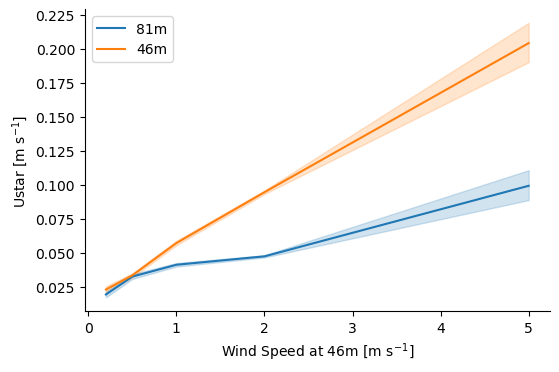

In [70]:
fig,ax1  = plt.subplots(1,1,figsize=(6,4),dpi=100)
sns.lineplot(x='Wsp_mid',y='value',hue='variable',data=melt2,estimator='mean',ax=ax1)
ax1.set_xlabel('Wind Speed at 46m [m s$^{-1}$]')
ax1.set_ylabel('Ustar [m s$^{-1}$]')
ax1.legend(labels=['81m','46m'])
sns.despine()
plt.show()

### Creating final plot for rebuttal
---

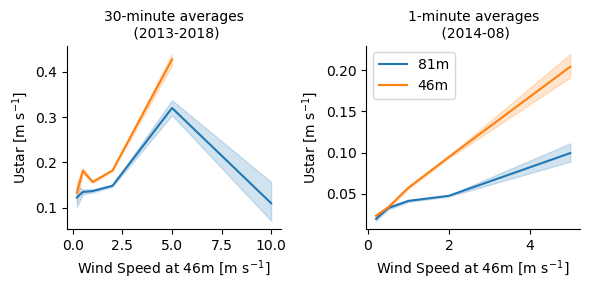

In [71]:
# Final plot
fig,(ax1,ax2)  = plt.subplots(1,2,figsize=(6,3),dpi=100)

sns.lineplot(x='Wsp_mid46m',y='value',hue='variable',data=melt,estimator='mean',ax=ax1)
ax1.set_xlabel('Wind Speed at 46m [m s$^{-1}$]')
ax1.set_ylabel('Ustar [m s$^{-1}$]')
#ax1.legend(labels=['81m','46m'])
ax1.get_legend().remove()
ax1.set_title('30-minute averages\n (2013-2018)',fontsize=10)
sns.despine()

sns.lineplot(x='Wsp_mid',y='value',hue='variable',data=melt2,estimator='mean',ax=ax2)
ax2.set_xlabel('Wind Speed at 46m [m s$^{-1}$]')
ax2.set_ylabel('Ustar [m s$^{-1}$]')
ax2.legend(labels=['81m','46m'])
ax2.set_title('1-minute averages\n (2014-08)',fontsize=10)
sns.despine()
plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
plt.show()
fig.savefig('../Rebuttal/FrictionVelocity_Wsp46m.png',dpi=300)